# Taller 2b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./src')  # Para importar desde el módulo src

from iterative_methods import gauss_jacobi, gauss_seidel


[07-15 17:27:49][INFO] 2025-07-15 17:27:49.819929


In [9]:
def plot_trajectory(tray, title, eq_lines=[]):
    tray_np = np.hstack(tray).T  # (n_iters x 2)

    fig, ax = plt.subplots(figsize=(7, 5))

    # Dibujar todas las líneas de ecuación (si se dan)
    x_vals = np.linspace(min(tray_np[:, 0]) - 2, max(tray_np[:, 0]) + 2, 200)
    for i, line in enumerate(eq_lines):
        y_vals = line(x_vals)
        ax.plot(x_vals, y_vals, linestyle='-', alpha=0.6, label=f'Ecuación {i+1}', linewidth=2)

    # Trayectoria iterativa
    ax.plot(tray_np[:, 0], tray_np[:, 1], 'o--', label='Iteraciones', zorder=1)

    # Etiquetas con número de iteración
    for i, (x, y) in enumerate(tray_np):
        ax.text(x + 0.2, y + 0.2, str(i), fontsize=8, color='blue')

    # Puntos de inicio y final
    ax.scatter(tray_np[0, 0], tray_np[0, 1], color='green', label='Inicio', s=100, zorder=3)
    ax.scatter(tray_np[-1, 0], tray_np[-1, 1], color='red', label='Final', s=100, zorder=3)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    ax.axis('equal')
    plt.show()


[07-15 17:43:32][INFO] i= 0 x: [[0. 0.]]
[07-15 17:43:32][INFO] i= 1 x: [[7. 0.]]
[07-15 17:43:32][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:43:32][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:43:32][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:43:32][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:43:32][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:43:32][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:43:32][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:43:32][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:43:32][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:43:32][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:43:32][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:43:32][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:43:32][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:43:32][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 17:43:32][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:43:32][INFO] i= 17 x: [[5.00131072 1.99868928]]
[07-15 17:43:32][INFO] i= 18 x: [[5.00131072 2.00052429]]
[07-15 17:43:32][INFO] i= 19 x: [[4.99947571 2.00052

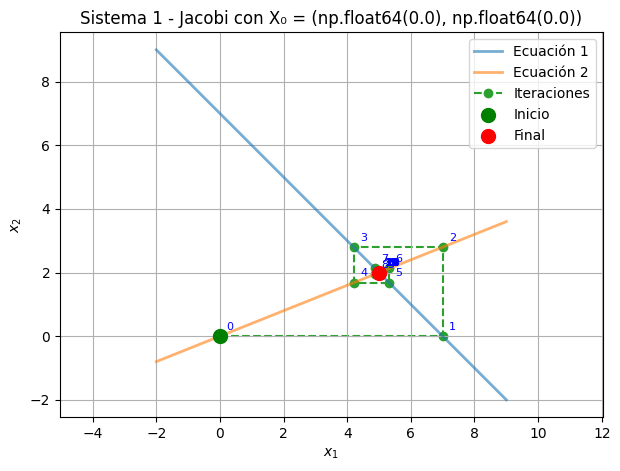

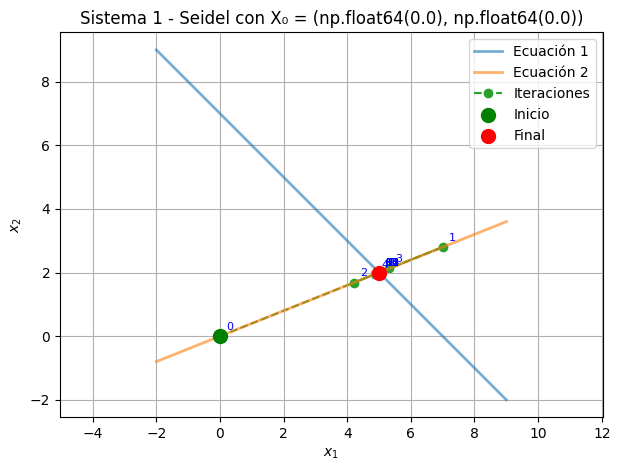

[07-15 17:43:33][INFO] i= 0 x: [[5. 2.]]
[07-15 17:43:33][INFO] i= 0 x: [[5. 2.]]


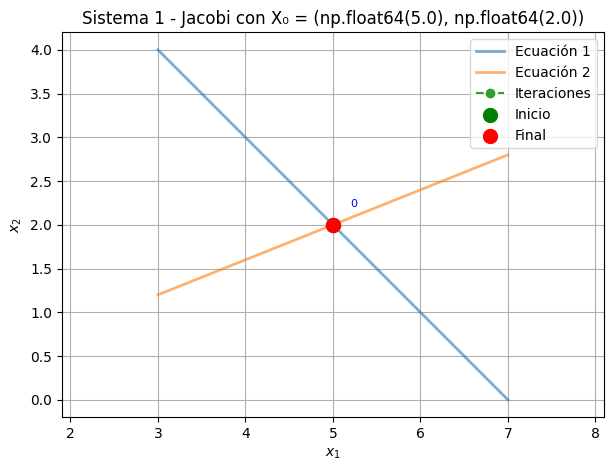

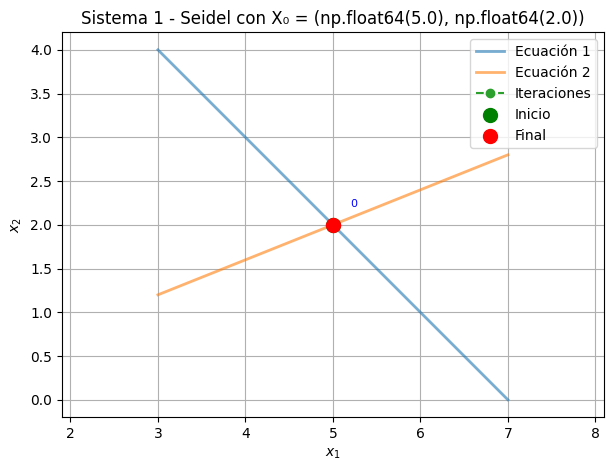

In [ ]:
# Sistema 1: x1 + x2 = 7 ; -2x1 + 5x2 = 0
A1 = np.array([[1, 1],
               [-2, 5]])
b1 = np.array([[7], [0]])
iniciales1 = [
    np.array([[0.0], [0.0]]),
    np.array([[5.0], [2.0]])
]

# Ecuaciones del sistema: x2 = 7 - x1 y x2 = (2/5)x1
eqs_sistema1 = [lambda x: 7 - x, lambda x: (2/5) * x]

for x0 in iniciales1:
    _, tray_jacobi = gauss_jacobi(A=A1, b=b1, x0=x0, tol=1e-5, max_iter=50)
    _, tray_seidel, *_ = gauss_seidel(A=A1, b=b1, x0=x0, tol=1e-5, max_iter=50)

    plot_trajectory(tray_jacobi, f"Sistema 1 - Jacobi con X₀ = {tuple(x0.flatten())}", eq_lines=eqs_sistema1)
    plot_trajectory(tray_seidel, f"Sistema 1 - Seidel con X₀ = {tuple(x0.flatten())}", eq_lines=eqs_sistema1)


[07-15 17:43:37][INFO] i= 0 x: [[5. 2.]]
[07-15 17:43:37][INFO] i= 1 x: [[ 4. 10.]]
[07-15 17:43:37][INFO] i= 2 x: [[-4.  8.]]
[07-15 17:43:37][INFO] i= 3 x: [[-2. -8.]]
[07-15 17:43:37][INFO] i= 4 x: [[14. -4.]]
[07-15 17:43:37][INFO] i= 5 x: [[10. 28.]]
[07-15 17:43:37][INFO] i= 6 x: [[-22.  20.]]
[07-15 17:43:37][INFO] i= 7 x: [[-14. -44.]]
[07-15 17:43:37][INFO] i= 8 x: [[ 50. -28.]]
[07-15 17:43:37][INFO] i= 9 x: [[ 34. 100.]]
[07-15 17:43:37][INFO] i= 10 x: [[-94.  68.]]
[07-15 17:43:37][INFO] i= 11 x: [[ -62. -188.]]
[07-15 17:43:37][INFO] i= 12 x: [[ 194. -124.]]
[07-15 17:43:37][INFO] i= 13 x: [[130. 388.]]
[07-15 17:43:37][INFO] i= 14 x: [[-382.  260.]]
[07-15 17:43:37][INFO] i= 15 x: [[-254. -764.]]
[07-15 17:43:37][INFO] i= 16 x: [[ 770. -508.]]
[07-15 17:43:37][INFO] i= 17 x: [[ 514. 1540.]]
[07-15 17:43:37][INFO] i= 18 x: [[-1534.  1028.]]
[07-15 17:43:37][INFO] i= 19 x: [[-1022. -3068.]]
[07-15 17:43:37][INFO] i= 20 x: [[ 3074. -2044.]]
[07-15 17:43:37][INFO] i= 21 x: [[

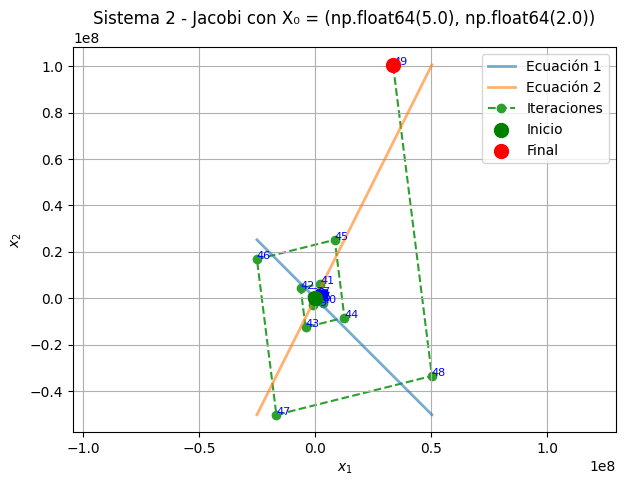

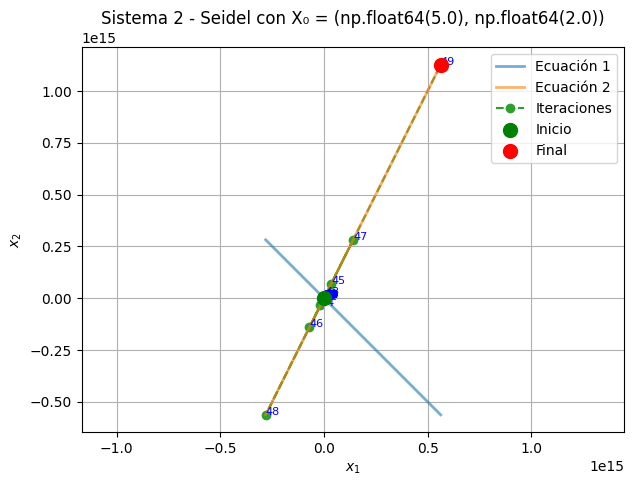

⚠️ Jacobi diverge con X₀ = (np.float64(5.0), np.float64(2.0)) (Δ = 135262239.6909)
⚠️ Seidel diverge con X₀ = (np.float64(5.0), np.float64(2.0)) (Δ = 1888191545670591.0000)
[07-15 17:43:38][INFO] i= 0 x: [[-5.  4.]]
[07-15 17:43:38][INFO] i= 1 x: [[  2. -10.]]
[07-15 17:43:38][INFO] i= 2 x: [[16.  4.]]
[07-15 17:43:38][INFO] i= 3 x: [[ 2. 32.]]
[07-15 17:43:38][INFO] i= 4 x: [[-26.   4.]]
[07-15 17:43:38][INFO] i= 5 x: [[  2. -52.]]
[07-15 17:43:38][INFO] i= 6 x: [[58.  4.]]
[07-15 17:43:38][INFO] i= 7 x: [[  2. 116.]]
[07-15 17:43:38][INFO] i= 8 x: [[-110.    4.]]
[07-15 17:43:38][INFO] i= 9 x: [[   2. -220.]]
[07-15 17:43:38][INFO] i= 10 x: [[226.   4.]]
[07-15 17:43:38][INFO] i= 11 x: [[  2. 452.]]
[07-15 17:43:38][INFO] i= 12 x: [[-446.    4.]]
[07-15 17:43:38][INFO] i= 13 x: [[   2. -892.]]
[07-15 17:43:38][INFO] i= 14 x: [[898.   4.]]
[07-15 17:43:38][INFO] i= 15 x: [[   2. 1796.]]
[07-15 17:43:38][INFO] i= 16 x: [[-1790.     4.]]
[07-15 17:43:38][INFO] i= 17 x: [[ 2.00e+00 -3.58

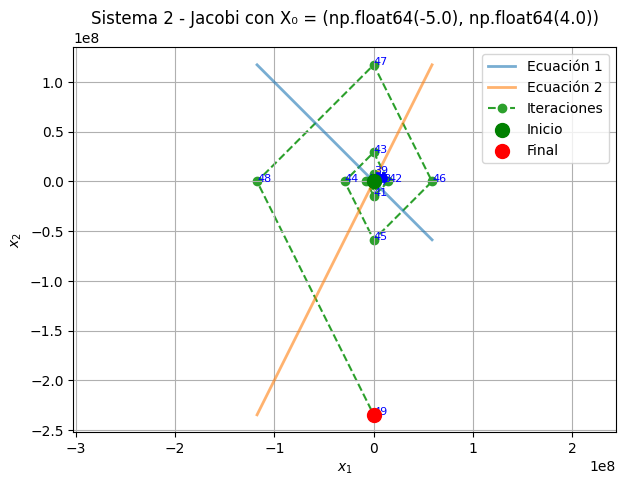

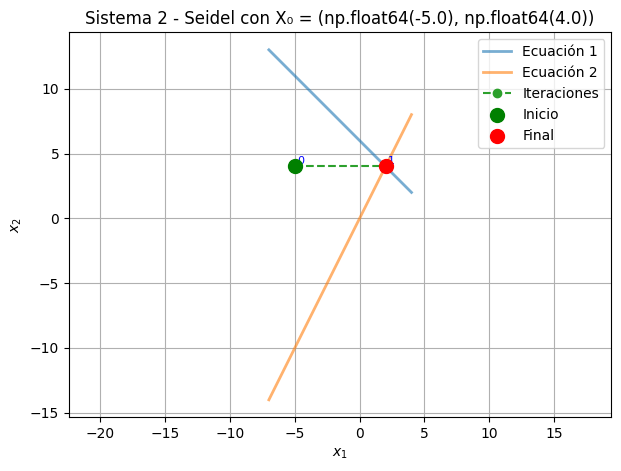

⚠️ Jacobi diverge con X₀ = (np.float64(-5.0), np.float64(4.0)) (Δ = 262604968.1444)
⚠️ Seidel diverge con X₀ = (np.float64(-5.0), np.float64(4.0)) (Δ = 7.0000)
[07-15 17:43:38][INFO] i= 0 x: [[ 10. -10.]]
[07-15 17:43:38][INFO] i= 1 x: [[16. 20.]]
[07-15 17:43:38][INFO] i= 2 x: [[-14.  32.]]
[07-15 17:43:38][INFO] i= 3 x: [[-26. -28.]]
[07-15 17:43:38][INFO] i= 4 x: [[ 34. -52.]]
[07-15 17:43:38][INFO] i= 5 x: [[58. 68.]]
[07-15 17:43:38][INFO] i= 6 x: [[-62. 116.]]
[07-15 17:43:38][INFO] i= 7 x: [[-110. -124.]]
[07-15 17:43:38][INFO] i= 8 x: [[ 130. -220.]]
[07-15 17:43:38][INFO] i= 9 x: [[226. 260.]]
[07-15 17:43:38][INFO] i= 10 x: [[-254.  452.]]
[07-15 17:43:38][INFO] i= 11 x: [[-446. -508.]]
[07-15 17:43:38][INFO] i= 12 x: [[ 514. -892.]]
[07-15 17:43:38][INFO] i= 13 x: [[ 898. 1028.]]
[07-15 17:43:38][INFO] i= 14 x: [[-1022.  1796.]]
[07-15 17:43:38][INFO] i= 15 x: [[-1790. -2044.]]
[07-15 17:43:38][INFO] i= 16 x: [[ 2050. -3580.]]
[07-15 17:43:38][INFO] i= 17 x: [[3586. 4100.]]


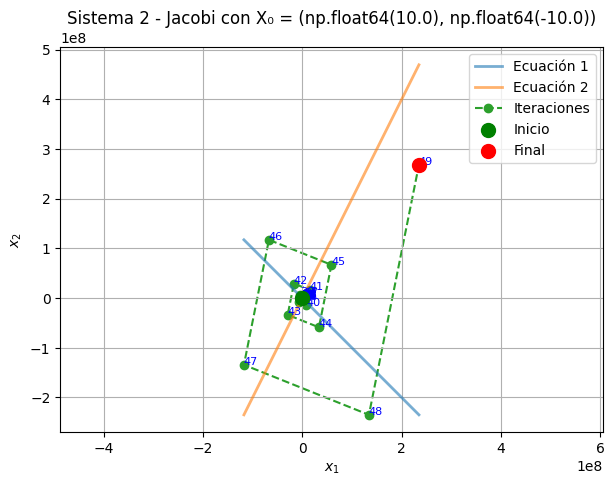

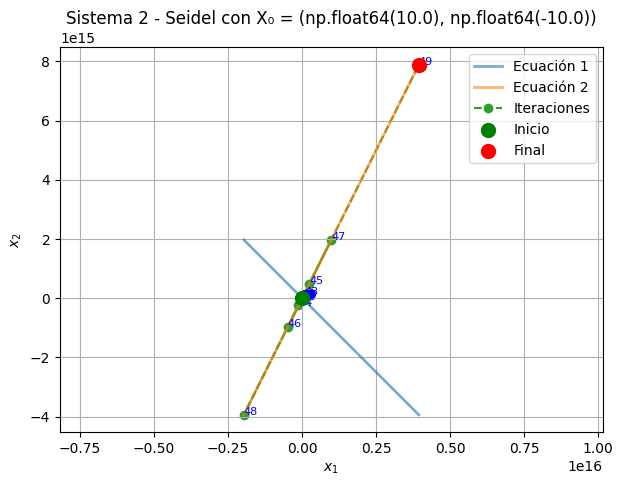

⚠️ Jacobi diverge con X₀ = (np.float64(10.0), np.float64(-10.0)) (Δ = 513284110.6066)
⚠️ Seidel diverge con X₀ = (np.float64(10.0), np.float64(-10.0)) (Δ = 13217340819694136.0000)


In [ ]:
# Sistema 2: x1 + x2 = 6 ; -2x1 + x2 = 0
A2 = np.array([[1, 1],
               [-2, 1]])
b2 = np.array([[6], [0]])
iniciales2 = [
    np.array([[5.0], [2.0]]),
    np.array([[-5.0], [4.0]]),
    np.array([[10.0], [-10.0]])
]

# Ecuaciones del sistema: x2 = 6 - x1 y x2 = 2x1
eqs_sistema2 = [lambda x: 6 - x, lambda x: 2 * x]

for x0 in iniciales2:
    _, tray_jacobi = gauss_jacobi(A=A2, b=b2, x0=x0, tol=1e-5, max_iter=50)
    _, tray_seidel, *_ = gauss_seidel(A=A2, b=b2, x0=x0, tol=1e-5, max_iter=50)

    plot_trajectory(tray_jacobi, f"Sistema 2 - Jacobi con X₀ = {tuple(x0.flatten())}", eq_lines=eqs_sistema2)
    plot_trajectory(tray_seidel, f"Sistema 2 - Seidel con X₀ = {tuple(x0.flatten())}", eq_lines=eqs_sistema2)

    delta_jacobi = np.linalg.norm(tray_jacobi[-1] - tray_jacobi[-2])
    delta_seidel = np.linalg.norm(tray_seidel[-1] - tray_seidel[-2])

    if delta_jacobi > 1:
        print(f"⚠️ Jacobi diverge con X₀ = {tuple(x0.flatten())} (Δ = {delta_jacobi:.4f})")
    if delta_seidel > 1:
        print(f"⚠️ Seidel diverge con X₀ = {tuple(x0.flatten())} (Δ = {delta_seidel:.4f})")
